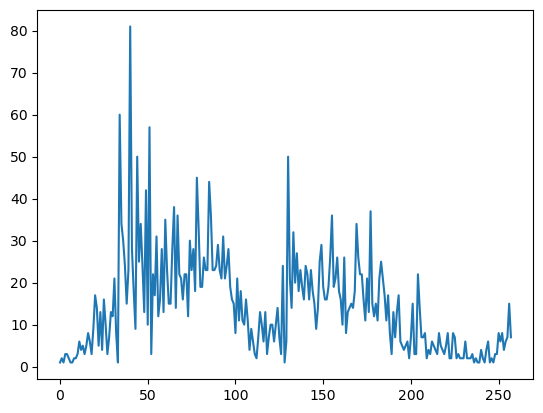

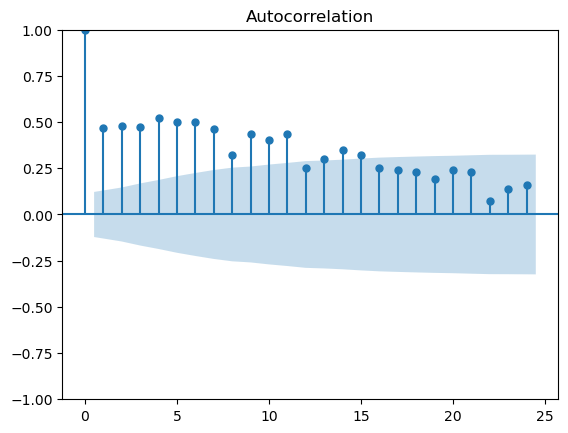

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


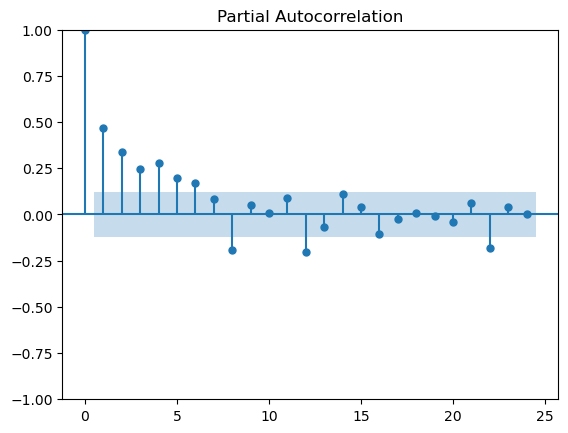

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\連江縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Lienchiang.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Lienchiang_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Lienchiang_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\連江縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        2
2        1
3        3
4        3
..     ...
254      6
255      7
256     15
257      7
258      6

[259 rows x 1 columns]
259


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
24/24 [==============================] - 7s 91ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 3/5000
24/24 [==============================

24/24 [==============================] - 0s 10ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 57/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 58/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 59/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 60/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 61/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 62/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 63/5000
24/24 [==============================] - 0s 10ms/step - loss: 

24/24 [==============================] - 0s 10ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 118/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 119/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 120/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 121/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 122/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 123/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 124/5000
24/24 [==============================] - 0s 12ms/step -

Epoch 178/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 179/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 180/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 181/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 182/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 183/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 184/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 185/5000
24/24 [==============================] -

Epoch 239/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 240/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 241/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 242/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 243/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 244/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 245/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 246/5000
24/24 [==============================] -

Epoch 300/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 301/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 302/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 303/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 304/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 305/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 306/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 307/5000
24/24 [==============================] -

Epoch 361/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 362/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 363/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 364/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 365/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 366/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 367/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 368/5000
24/24 [==============================] -

Epoch 422/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 423/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 424/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 425/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 426/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 427/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 428/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 429/5000
24/24 [==============================] -

Epoch 483/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 484/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 485/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 486/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 487/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 488/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 489/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 490/5000
24/24 [==============================] -

Epoch 544/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 545/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 546/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 547/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 548/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 549/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 550/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 551/5000
24/24 [==============================] -

Epoch 605/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 606/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 607/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 608/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 609/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 610/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 611/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 612/5000
24/24 [==============================] -

Epoch 666/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 667/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 668/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 669/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 670/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 671/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 672/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 673/5000
24/24 [==============================] -

Epoch 727/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 728/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 729/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 730/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 731/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 732/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 733/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 734/5000
24/24 [==============================] -

Epoch 788/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 789/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 790/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 791/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 792/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 793/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 794/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 795/5000
24/24 [==============================] -

Epoch 849/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 850/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 851/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 852/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 853/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 854/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 855/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 856/5000
24/24 [==============================] -

Epoch 910/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 911/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 912/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 913/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 914/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 915/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 916/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 917/5000
24/24 [==============================] -

Epoch 971/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 972/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 973/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 974/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 975/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 976/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 977/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 978/5000
24/24 [==============================] -

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1032/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1033/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1034/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1035/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1036/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1037/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1038/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1092/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1093/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1094/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1095/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1096/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1097/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1098/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1152/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1153/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1154/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1155/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1156/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1157/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1158/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1212/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1213/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1214/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1215/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1216/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1217/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1218/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1272/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 1273/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 1274/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 1275/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1276/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1277/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1278/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1332/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1333/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1334/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1335/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1336/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1337/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1338/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 1392/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1393/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1394/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1395/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1396/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1397/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1398/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1452/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1453/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1454/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1455/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1456/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1457/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1458/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1512/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1513/5000
24/24 [==============================] - 0s 20ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1514/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1515/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1516/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1517/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1518/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1572/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1573/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1574/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1575/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1576/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1577/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1578/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1632/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1633/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1634/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1635/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1636/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1637/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1638/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 16ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1692/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1693/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1694/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1695/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1696/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1697/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1698/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1752/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1753/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1754/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1755/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1756/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1757/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1758/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1812/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1813/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1814/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1815/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1816/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1817/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1818/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1872/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1873/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1874/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1875/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1876/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1877/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1878/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1932/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1933/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1934/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1935/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1936/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1937/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1938/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1992/5000
24/24 [==============================] - 1s 27ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1993/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1994/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1995/5000
24/24 [==============================] - 0s 19ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1996/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1997/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1998/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2052/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2053/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2054/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2055/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2056/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2057/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2058/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2112/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2113/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2114/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2115/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2116/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2117/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2118/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2172/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2173/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2174/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2175/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2176/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2177/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2178/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2232/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2233/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2234/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2235/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2236/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2237/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2238/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2292/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2293/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2294/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2295/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 2296/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 2297/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2298/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2352/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2353/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 2354/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 2355/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 2356/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2357/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 2358/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2412/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2413/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2414/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2415/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2416/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2417/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2418/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2472/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2473/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2474/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2475/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2476/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2477/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2478/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2532/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2533/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2534/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2535/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2536/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2537/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2538/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2592/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2593/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2594/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2595/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2596/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2597/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2598/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2652/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2653/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2654/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2655/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2656/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2657/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2658/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2712/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2713/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2714/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2715/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2716/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2717/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2718/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2772/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2773/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2774/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2775/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2776/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2777/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2778/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2832/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2833/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2834/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2835/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2836/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2837/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2838/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2892/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2893/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2894/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2895/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2896/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2897/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2898/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2952/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2953/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2954/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2955/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2956/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2957/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2958/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3012/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3013/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3014/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3015/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3016/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3017/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3018/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3072/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3073/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3074/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3075/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3076/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3077/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3078/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 3132/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3133/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3134/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3135/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3136/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3137/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3138/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3192/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3193/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3194/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3195/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3196/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3197/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3198/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3252/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3253/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3254/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3255/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3256/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3257/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3258/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3312/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3313/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3314/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3315/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3316/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3317/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3318/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3372/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3373/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3374/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3375/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3376/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3377/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3378/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3432/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3433/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3434/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3435/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3436/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3437/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3438/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3492/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3493/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3494/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3495/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3496/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3497/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3498/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3552/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3553/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3554/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3555/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3556/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3557/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3558/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3612/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3613/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3614/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3615/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3616/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3617/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3618/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3672/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3673/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 3674/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3675/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3676/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3677/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3678/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3732/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 3733/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3734/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3735/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3736/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3737/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3738/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3792/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3793/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3794/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3795/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3796/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3797/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3798/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3852/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3853/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3854/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3855/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3856/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3857/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3858/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 3912/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3913/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3914/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3915/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3916/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3917/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3918/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3972/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3973/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3974/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3975/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3976/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3977/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3978/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4032/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4033/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4034/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4035/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4036/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4037/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4038/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4092/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4093/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4094/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4095/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4096/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4097/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4098/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4152/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4153/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4154/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 4155/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 4156/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4157/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4158/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4212/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4213/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4214/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 4215/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4216/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4217/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4218/5000
24/24 [==============================] - 0s 15ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4272/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4273/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4274/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4275/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4276/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4277/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4278/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4332/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4333/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4334/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4335/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4336/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4337/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4338/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4392/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4393/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4394/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4395/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4396/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4397/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4398/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4452/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4453/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4454/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4455/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4456/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4457/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4458/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4512/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4513/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 4514/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4515/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4516/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4517/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4518/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4572/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4573/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4574/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4575/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4576/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4577/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4578/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4632/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4633/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 4634/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 4635/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4636/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4637/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4638/5000
24/24 [==============================] - 0s 10ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4692/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4693/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4694/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 4695/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 4696/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4697/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4698/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4752/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4753/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4754/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4755/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4756/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4757/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4758/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4812/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4813/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4814/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4815/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 4816/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4817/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4818/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4872/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4873/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4874/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4875/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4876/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4877/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4878/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4932/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4933/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4934/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4935/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4936/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 4937/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4938/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4992/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 4993/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4994/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4995/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4996/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4997/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 4998/5000
24/24 [==============================] - 0s 11ms

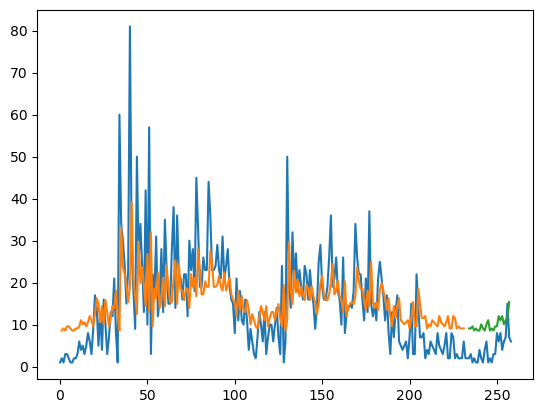

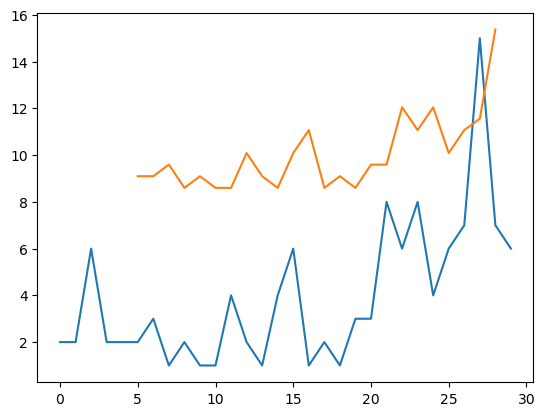

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="lienchiang_rnn+lstm_5000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('lienchiang_rnn+lstm_5000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lienchiang_rnn+lstm_5000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("lienchiang_rnn+lstm_5000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
24/24 [==============================] - 9s 90ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 3/5000
24/24 [==========================

24/24 [==============================] - 0s 11ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 57/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 58/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 59/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 60/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 61/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 62/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 63/5000
24/24 [==============================] - 0s 11ms/step - loss: 

24/24 [==============================] - 0s 11ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 118/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 119/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 120/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 121/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 122/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 123/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 124/5000
24/24 [==============================] - 0s 11ms/step -

Epoch 178/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 179/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 180/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 181/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 182/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 183/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 184/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 185/5000
24/24 [==============================] -

Epoch 239/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 240/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 241/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 242/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 243/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 244/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 245/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 246/5000
24/24 [==============================] -

Epoch 300/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 301/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 302/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 303/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 304/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 305/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 306/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 307/5000
24/24 [==============================] -

Epoch 361/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 362/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 363/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 364/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 365/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 366/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 367/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 368/5000
24/24 [==============================] -

Epoch 422/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 423/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 424/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 425/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 426/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 427/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 428/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 429/5000
24/24 [==============================] -

Epoch 483/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 484/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 485/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 486/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 487/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 488/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 489/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 490/5000
24/24 [==============================] -

Epoch 544/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 545/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 546/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 547/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 548/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 549/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 550/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 551/5000
24/24 [==============================] -

Epoch 605/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 606/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 607/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 608/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 609/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 610/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 611/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 612/5000
24/24 [==============================] -

Epoch 666/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 667/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 668/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 669/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 670/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 671/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 672/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 673/5000
24/24 [==============================] -

Epoch 727/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 728/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 729/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 730/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 731/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 732/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 733/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 734/5000
24/24 [==============================] -

Epoch 788/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 789/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 790/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 791/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 792/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 793/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 794/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 795/5000
24/24 [==============================] -

Epoch 849/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 850/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 851/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 852/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 853/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 854/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 855/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 856/5000
24/24 [==============================] -

Epoch 910/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 911/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 912/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 913/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 914/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 915/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 916/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 917/5000
24/24 [==============================] -

Epoch 971/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 972/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 973/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 974/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 975/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 976/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 977/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 978/5000
24/24 [==============================] -

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1032/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1033/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1034/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1035/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1036/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1037/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1038/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1092/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1093/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1094/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1095/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1096/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1097/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1098/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1152/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1153/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1154/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1155/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1156/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1157/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1158/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1212/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1213/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1214/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1215/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1216/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1217/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1218/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1272/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 1273/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 1274/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 1275/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1276/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1277/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1278/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1332/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1333/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1334/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1335/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1336/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1337/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1338/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 1392/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1393/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1394/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1395/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1396/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1397/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1398/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1452/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1453/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1454/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1455/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1456/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1457/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1458/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1512/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1513/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1514/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1515/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1516/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1517/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1518/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1572/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1573/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1574/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1575/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1576/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1577/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1578/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1632/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1633/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1634/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1635/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1636/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1637/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1638/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1692/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1693/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1694/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1695/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1696/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1697/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1698/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1752/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1753/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1754/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1755/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1756/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1757/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1758/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1812/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1813/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1814/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1815/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1816/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1817/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1818/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1872/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1873/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1874/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1875/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1876/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1877/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1878/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1932/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1933/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1934/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1935/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1936/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1937/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1938/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1992/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1993/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1994/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1995/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1996/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1997/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1998/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2052/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2053/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2054/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2055/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2056/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2057/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2058/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2112/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2113/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2114/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2115/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2116/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2117/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2118/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2172/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2173/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2174/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2175/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2176/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2177/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2178/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2232/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2233/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2234/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2235/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2236/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2237/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2238/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2292/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2293/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2294/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2295/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 2296/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 2297/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2298/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2352/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2353/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 2354/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 2355/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 2356/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2357/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 2358/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2412/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2413/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2414/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2415/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2416/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2417/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2418/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2472/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2473/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2474/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2475/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2476/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2477/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2478/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2532/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2533/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2534/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2535/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2536/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2537/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2538/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2592/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2593/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2594/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2595/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2596/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2597/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2598/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2652/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2653/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2654/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2655/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2656/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2657/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2658/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2712/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2713/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2714/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2715/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2716/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2717/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2718/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2772/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2773/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2774/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2775/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2776/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2777/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2778/5000
24/24 [==============================] - 0s 10ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2832/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2833/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2834/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2835/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2836/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2837/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2838/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2892/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2893/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 2894/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2895/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2896/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2897/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2898/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2952/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2953/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2954/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2955/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2956/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2957/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2958/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3012/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3013/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3014/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3015/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3016/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3017/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3018/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3072/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3073/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3074/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3075/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3076/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 3077/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3078/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3132/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3133/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3134/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3135/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3136/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3137/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3138/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3192/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3193/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3194/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3195/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3196/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3197/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3198/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 3252/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3253/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3254/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3255/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3256/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3257/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3258/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3312/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3313/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3314/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3315/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3316/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3317/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3318/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3372/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3373/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3374/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3375/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3376/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3377/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3378/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 3432/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 3433/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3434/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3435/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3436/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3437/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3438/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3492/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3493/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3494/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3495/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3496/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3497/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3498/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3552/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3553/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3554/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3555/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3556/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3557/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3558/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3612/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3613/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3614/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3615/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3616/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3617/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3618/5000
24/24 [==============================] - 0s 10ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 3672/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3673/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 3674/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 3675/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 3676/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3677/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3678/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3732/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 3733/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3734/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3735/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3736/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3737/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3738/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3792/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3793/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3794/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3795/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3796/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3797/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3798/5000
24/24 [==============================] - 0s 10ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3852/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 3853/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3854/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3855/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3856/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3857/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3858/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3912/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3913/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3914/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3915/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3916/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3917/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3918/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3972/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3973/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3974/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3975/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3976/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3977/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3978/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4032/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4033/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4034/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4035/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4036/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4037/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4038/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 4092/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4093/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 4094/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 4095/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4096/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4097/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4098/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4152/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4153/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4154/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 4155/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 4156/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 4157/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4158/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4212/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4213/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4214/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4215/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4216/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4217/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4218/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4272/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4273/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4274/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4275/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4276/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4277/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4278/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4332/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4333/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4334/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4335/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4336/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4337/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4338/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4392/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4393/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4394/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4395/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4396/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4397/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 4398/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4452/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4453/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4454/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4455/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4456/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4457/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4458/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4512/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 4513/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 4514/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4515/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4516/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4517/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4518/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4572/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4573/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4574/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4575/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4576/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4577/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4578/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4632/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4633/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 4634/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 4635/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4636/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 4637/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4638/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4692/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4693/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4694/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 4695/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 4696/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4697/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4698/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4752/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4753/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4754/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4755/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4756/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4757/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4758/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4812/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4813/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4814/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4815/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 4816/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4817/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4818/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4872/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4873/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4874/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4875/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4876/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4877/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4878/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4932/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4933/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4934/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4935/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4936/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4937/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4938/5000
24/24 [==============================] - 0s 11ms

24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4992/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4993/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4994/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4995/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 4996/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4997/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 4998/5000
24/24 [==============================] - 0s 12ms

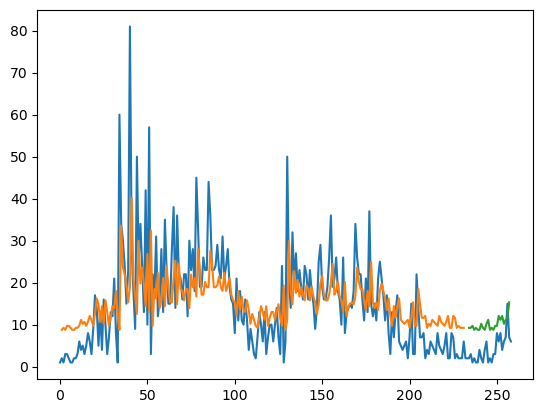

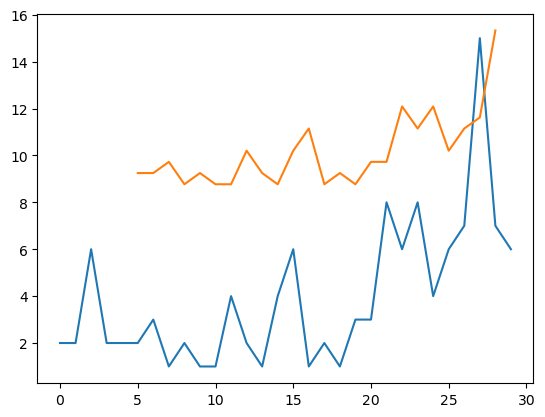

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="lienchiang_rnn+lstm_5000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('lienchiang_rnn+lstm_5000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lienchiang_rnn+lstm_5000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("lienchiang_rnn+lstm_5000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

24/24 [==============================] - 0s 12ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 54/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 55/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 56/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 57/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 58/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 59/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 60/5000
24/24 [==============================] - 0s 12ms/step - loss: 

24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 115/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 116/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 117/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 118/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 119/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 120/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 121/5000
24/24 [==============================] - 0s 15ms/step -

Epoch 175/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 176/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 177/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 178/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 179/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 180/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 181/5000
24/24 [==============================] - 0s 20ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 182/5000
24/24 [==============================] -

Epoch 236/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 237/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 238/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 239/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 240/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 241/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 242/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 243/5000
24/24 [==============================] -

Epoch 297/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 298/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 299/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 300/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 301/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 302/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 303/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 304/5000
24/24 [==============================] -

Epoch 358/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 359/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 360/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 361/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 362/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 363/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 364/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 365/5000
24/24 [==============================] -

Epoch 419/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 420/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 421/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 422/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 423/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 424/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 425/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 426/5000
24/24 [==============================] -

Epoch 480/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 481/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 482/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 483/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 484/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 485/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 486/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 487/5000
24/24 [==============================] -

Epoch 541/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 542/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 543/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 544/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 545/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 546/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 547/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 548/5000
24/24 [==============================] -

Epoch 602/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 603/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 604/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 605/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 606/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 607/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 608/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 609/5000
24/24 [==============================] -

Epoch 663/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 664/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 665/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 666/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 667/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 668/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 669/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 670/5000
24/24 [==============================] -

Epoch 724/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 725/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 726/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 727/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 728/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 729/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 730/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 731/5000
24/24 [==============================] -

Epoch 785/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 786/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 787/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 788/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 789/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 790/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 791/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 792/5000
24/24 [==============================] -

Epoch 846/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 847/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 848/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 849/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 850/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 851/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 852/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 853/5000
24/24 [==============================] -

Epoch 907/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 908/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 909/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 910/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 911/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 912/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 913/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 914/5000
24/24 [==============================] -

Epoch 968/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 969/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 970/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 971/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 972/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 973/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 974/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 975/5000
24/24 [==============================] -

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1029/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1030/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1031/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1032/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1033/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1034/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1035/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1089/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1090/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1091/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1092/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1093/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1094/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1095/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1149/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1150/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1151/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1152/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1153/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1154/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1155/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1209/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1210/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1211/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1212/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1213/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1214/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1215/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1269/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1270/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1271/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1272/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 1273/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1274/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1275/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1329/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 1330/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1331/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1332/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1333/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 1334/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1335/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1389/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1390/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1391/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1392/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1393/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1394/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1395/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1449/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1450/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1451/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1452/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1453/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1454/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1455/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1509/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1510/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1511/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1512/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1513/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1514/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1515/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1569/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1570/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1571/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1572/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1573/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1574/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1575/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1629/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1630/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1631/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 1632/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1633/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1634/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1635/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1689/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1690/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1691/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1692/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1693/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1694/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1695/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1749/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1750/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1751/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1752/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1753/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1754/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1755/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1809/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1810/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1811/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1812/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1813/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1814/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1815/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1869/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1870/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1871/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1872/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1873/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1874/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1875/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1929/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1930/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1931/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1932/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1933/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1934/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1935/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1989/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1990/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1991/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1992/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1993/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1994/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1995/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2049/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2050/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 2051/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2052/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2053/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2054/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2055/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 2109/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2110/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2111/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2112/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2113/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2114/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2115/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2169/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2170/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2171/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2172/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2173/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2174/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2175/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2229/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2230/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2231/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2232/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2233/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2234/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2235/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2289/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2290/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2291/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2292/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2293/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2294/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2295/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2349/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2350/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2351/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2352/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2353/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2354/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2355/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2409/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2410/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2411/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2412/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2413/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2414/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2415/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2469/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2470/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2471/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2472/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2473/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2474/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2475/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2529/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2530/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2531/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2532/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2533/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2534/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2535/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2589/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2590/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2591/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2592/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2593/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2594/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2595/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2649/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2650/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2651/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2652/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2653/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2654/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2655/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2709/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2710/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2711/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2712/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2713/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2714/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2715/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2769/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2770/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2771/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2772/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2773/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2774/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2775/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2829/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 2830/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2831/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2832/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2833/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2834/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2835/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2889/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2890/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2891/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2892/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2893/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 2894/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2895/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2949/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2950/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2951/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2952/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2953/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2954/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2955/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3009/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3010/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3011/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3012/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3013/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3014/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3015/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3069/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3070/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3071/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3072/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3073/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3074/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3075/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3129/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3130/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3131/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3132/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3133/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3134/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3135/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3189/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3190/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3191/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3192/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3193/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3194/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3195/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3249/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3250/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3251/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3252/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3253/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3254/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3255/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3309/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3310/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3311/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3312/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3313/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3314/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3315/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3369/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3370/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3371/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3372/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3373/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3374/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3375/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3429/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3430/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 3431/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3432/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3433/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3434/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3435/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3489/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3490/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3491/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3492/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3493/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3494/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3495/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3549/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3550/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3551/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3552/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3553/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3554/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3555/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3609/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3610/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3611/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3612/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3613/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3614/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3615/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3669/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3670/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3671/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3672/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3673/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3674/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3675/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3729/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3730/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3731/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3732/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 3733/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3734/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3735/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3789/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3790/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3791/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3792/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3793/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3794/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3795/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3849/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3850/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3851/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3852/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3853/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3854/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3855/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3909/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3910/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 3911/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3912/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3913/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3914/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3915/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3969/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3970/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3971/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3972/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3973/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3974/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3975/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4029/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4030/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4031/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4032/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4033/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4034/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4035/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4089/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4090/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4091/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4092/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4093/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 4094/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4095/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4149/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4150/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4151/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4152/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4153/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4154/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 4155/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4209/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4210/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4211/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4212/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4213/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4214/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4215/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4269/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4270/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4271/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4272/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4273/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4274/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4275/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4329/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4330/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4331/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4332/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4333/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4334/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4335/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4389/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4390/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4391/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4392/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4393/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4394/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4395/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4449/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4450/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4451/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4452/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4453/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4454/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4455/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4509/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4510/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4511/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4512/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4513/5000
24/24 [==============================] - 1s 21ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4514/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4515/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 16ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4569/5000
24/24 [==============================] - 0s 17ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4570/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4571/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4572/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4573/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4574/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4575/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 4s 179ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4629/5000
24/24 [==============================] - 5s 225ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4630/5000
24/24 [==============================] - 4s 161ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4631/5000
24/24 [==============================] - 5s 204ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4632/5000
24/24 [==============================] - 7s 299ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4633/5000
24/24 [==============================] - 9s 398ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4634/5000
24/24 [==============================] - 5s 232ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4635/5000
24/24 [==============================] - 

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4689/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4690/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4691/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4692/5000
24/24 [==============================] - 0s 18ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4693/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4694/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 4695/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4749/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4750/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4751/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4752/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4753/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4754/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4755/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4809/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4810/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4811/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4812/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4813/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4814/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4815/5000
24/24 [==============================] - 0s 13ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4869/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4870/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4871/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4872/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4873/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4874/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4875/5000
24/24 [==============================] - 0s 16ms

24/24 [==============================] - 0s 15ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4929/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4930/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4931/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4932/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4933/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4934/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4935/5000
24/24 [==============================] - 0s 14ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4989/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4990/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4991/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4992/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4993/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4994/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4995/5000
24/24 [==============================] - 0s 11ms

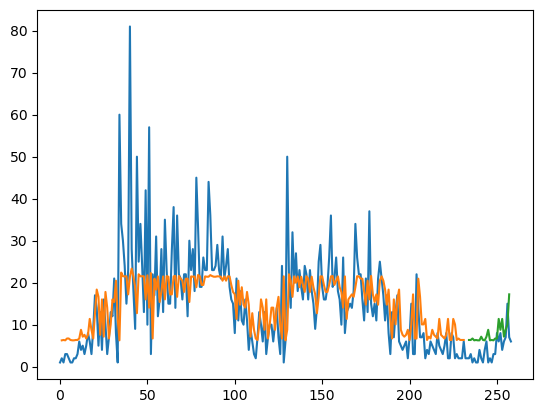

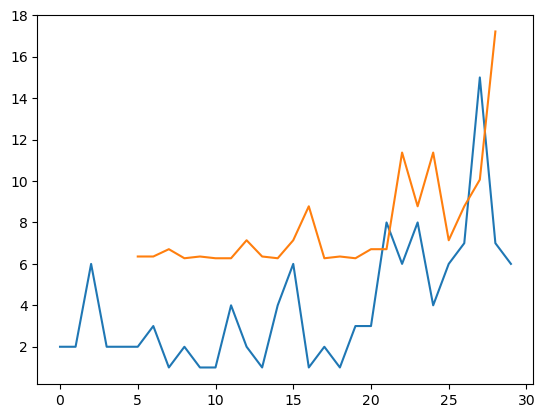

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="lienchiang_rnn+lstm_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('lienchiang_rnn+lstm_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lienchiang_rnn+lstm_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("lienchiang_rnn+lstm_5000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 52/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 53/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 54/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 55/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 56/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 57/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 58/5000
231/231 [==============================]

231/231 [==============================] - 3s 13ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 112/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 113/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 114/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 115/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 116/5000
231/231 [==============================] - 4s 19ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 117/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 118/5000
231/231 [==============================] - 3

231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 172/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 173/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 174/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 175/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 176/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 177/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 178/5000
231/231 [==============================] - 2s 8

231/231 [==============================] - 2s 9ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 232/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 233/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 234/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 235/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 236/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 237/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 238/5000
231/231 [==============================] - 2s 

231/231 [==============================] - 2s 8ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 292/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 293/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 294/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 295/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 296/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 297/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 298/5000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 352/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 353/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 354/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 355/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 356/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 357/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 358/5000
231/231 [==============================] - 2s 1

231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 412/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 413/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 414/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 415/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 416/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 417/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 418/5000
231/231 [==============================] - 2s 

231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 472/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 473/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 474/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 475/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 476/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 477/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 478/5000
231/231 [==============================] - 2s 

231/231 [==============================] - 2s 8ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 532/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 533/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 534/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 535/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 536/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 537/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 538/5000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 592/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 593/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 594/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 595/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 596/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 597/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 598/5000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 8ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 652/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 653/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 654/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 655/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 656/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 657/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 658/5000
231/231 [==============================] - 2s 1

231/231 [==============================] - 2s 8ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 712/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 713/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 714/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 715/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 716/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 717/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 718/5000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 772/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 773/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 774/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 775/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 776/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 777/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 778/5000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 7ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 832/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 833/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 834/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 835/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 836/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 837/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 838/5000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 892/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 893/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 894/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 895/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 896/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 897/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 898/5000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 952/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 953/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 954/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 955/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 956/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 957/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 958/5000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1012/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1013/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1014/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1015/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 1016/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1017/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1018/5000
231/231 [==============================] 

Epoch 1071/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1072/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 1073/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1074/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1075/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 1076/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 1077/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 1078/5000
231/231 [================

231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1131/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1132/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 1133/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1134/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1135/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1136/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 1137/5000
231/231 [==============================]

Epoch 1190/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1191/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 1192/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1193/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1194/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 1195/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 1196/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 1197/5000
231/231 [================

231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1250/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 1251/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 1252/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1253/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1254/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1255/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 1256/5000
231/231 [==============================] 

Epoch 1309/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1310/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1311/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1312/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 1313/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1314/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 1315/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1316/5000
231/231 [===============

231/231 [==============================] - 2s 10ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1369/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1370/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 1371/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 1372/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1373/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1374/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 1375/5000
231/231 [==============================]

Epoch 1428/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 1429/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 1430/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1431/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1432/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 1433/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 1434/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 1435/5000
231/231 [================

Epoch 1488/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1489/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1490/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1491/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 1492/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1493/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1494/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 1495/5000
231/231 [================

231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1548/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1549/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1550/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1551/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1552/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1553/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 1554/5000
231/231 [==============================] 

Epoch 1607/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1608/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1609/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 1610/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1611/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1612/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 1613/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1614/5000
231/231 [==============

231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 1667/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1668/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1669/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1670/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1671/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1672/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1673/5000
231/231 [==============================]

Epoch 1726/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1727/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1728/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1729/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1730/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1731/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1732/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 1733/5000
231/231 [===============

231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1786/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1787/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1788/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1789/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 1790/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 1791/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1792/5000
231/231 [==============================]

Epoch 1845/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1846/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1847/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 1848/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 1849/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1850/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 1851/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1852/5000
231/231 [===============

231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1905/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1906/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1907/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1908/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1909/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1910/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 1911/5000
231/231 [==============================]

231/231 [==============================] - 2s 9ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1964/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1965/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 1966/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1967/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 1968/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1969/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1970/5000
231/231 [==============================]

Epoch 2023/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2024/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2025/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 2026/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2027/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2028/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2029/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2030/5000
231/231 [===============

231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2083/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2084/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2085/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 2086/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2087/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2088/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2089/5000
231/231 [==============================]

Epoch 2142/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2143/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2144/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 2145/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2146/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2147/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2148/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2149/5000
231/231 [=============

231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2202/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2203/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2204/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2205/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2206/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2207/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2208/5000
231/231 [==============================] 

Epoch 2261/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2262/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2263/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2264/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2265/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2266/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2267/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2268/5000
231/231 [===============

Epoch 2321/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 2322/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2323/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2324/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2325/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2326/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2327/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2328/5000
231/231 [================

Epoch 2381/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2382/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2383/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2384/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 2385/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2386/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2387/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2388/5000
231/231 [================

Epoch 2441/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2442/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2443/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 2444/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 2445/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 2446/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 2447/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2448/5000
231/231 [================

231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2501/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 2502/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2503/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2504/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2505/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 2506/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 2507/5000
231/231 [=============================

Epoch 2560/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2561/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 2562/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2563/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2564/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2565/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2566/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2567/5000
231/231 [================

Epoch 2620/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2621/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2622/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 2623/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2624/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2625/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2626/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2627/5000
231/231 [================

Epoch 2680/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2681/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2682/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 2683/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2684/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2685/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2686/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2687/5000
231/231 [==============

231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2740/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2741/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2742/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2743/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2744/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2745/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2746/5000
231/231 [=============================

231/231 [==============================] - 2s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2799/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2800/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2801/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2802/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2803/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2804/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2805/5000
231/231 [==============================]

Epoch 2858/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 2859/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2860/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2861/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2862/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2863/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2864/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2865/5000
231/231 [===============

231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2918/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2919/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2920/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2921/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2922/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2923/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2924/5000
231/231 [=============================

231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2977/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2978/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2979/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2980/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2981/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2982/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2983/5000
231/231 [============================

231/231 [==============================] - 1s 6ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3036/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3037/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3038/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3039/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3040/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3041/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3042/5000
231/231 [==============================

Epoch 3095/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 3096/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 3097/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3098/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3099/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 3100/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3101/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3102/5000
231/231 [============

231/231 [==============================] - 3s 11ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3155/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3156/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3157/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3158/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3159/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 3160/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 3161/5000
231/231 [=============================

231/231 [==============================] - 2s 10ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 3214/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3215/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3216/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3217/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3218/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3219/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3220/5000
231/231 [=========================

231/231 [==============================] - 2s 10ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3273/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3274/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3275/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 3276/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3277/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 3278/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3279/5000
231/231 [=========================

231/231 [==============================] - 2s 10ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3332/5000
231/231 [==============================] - 3s 11ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 3333/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 3334/5000
231/231 [==============================] - 3s 11ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3335/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 3336/5000
231/231 [==============================] - 3s 12ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 3337/5000
231/231 [==============================] - 3s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 3338/5000
231/231 [=========================

231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 3391/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3392/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3393/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 3394/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3395/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3396/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3397/5000
231/231 [=============================

231/231 [==============================] - 2s 11ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3450/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3451/5000
231/231 [==============================] - 3s 11ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3452/5000
231/231 [==============================] - 3s 11ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 3453/5000
231/231 [==============================] - 3s 11ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3454/5000
231/231 [==============================] - 3s 12ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3455/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3456/5000
231/231 [=========================

231/231 [==============================] - 2s 10ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3509/5000
231/231 [==============================] - 3s 11ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3510/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 3511/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 3512/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 3513/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 3514/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 3515/5000
231/231 [=========================

231/231 [==============================] - 2s 10ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3568/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 3569/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3570/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3571/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3572/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3573/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3574/5000
231/231 [=========================

231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3627/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 3628/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3629/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 3630/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3631/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 3632/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3633/5000
231/231 [=========================

231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 3686/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3687/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 3688/5000
231/231 [==============================] - 2s 11ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3689/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 3690/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3691/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3692/5000
231/231 [=========================

231/231 [==============================] - 1s 6ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3745/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3746/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 3747/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 3748/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3749/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 3750/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3751/5000
231/231 [============================

Epoch 3804/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3805/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3806/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3807/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3808/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3809/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3810/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3811/5000
231/231 [===============

231/231 [==============================] - 2s 10ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3864/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3865/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3866/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3867/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3868/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 3869/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3870/5000
231/231 [==============================]

231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3923/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3924/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3925/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3926/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 3927/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3928/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3929/5000
231/231 [==============================

Epoch 3982/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3983/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 3984/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3985/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3986/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 3987/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3988/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3989/5000
231/231 [================

231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 4042/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 4043/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 4044/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 4045/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 4046/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4047/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4048/5000
231/231 [==============================]

Epoch 4101/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4102/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4103/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4104/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4105/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 4106/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 4107/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4108/5000
231/231 [================

Epoch 4161/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4162/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4163/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4164/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 4165/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 4166/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4167/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4168/5000
231/231 [================

231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 4221/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4222/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 4223/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4224/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4225/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4226/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4227/5000
231/231 [==============================] 

Epoch 4280/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4281/5000
231/231 [==============================] - 2s 6ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4282/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 4283/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 4284/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4285/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4286/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4287/5000
231/231 [================

Epoch 4340/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4341/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4342/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 4343/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4344/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4345/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 4346/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4347/5000
231/231 [================

Epoch 4400/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 4401/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4402/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4403/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4404/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4405/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4406/5000
231/231 [==============================] - 2s 8ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4407/5000
231/231 [================

231/231 [==============================] - 2s 10ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 4460/5000
231/231 [==============================] - 2s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 4461/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4462/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4463/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 4464/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4465/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 4466/5000
231/231 [============================

231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4519/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 4520/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 4521/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4522/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4523/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4524/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 4525/5000
231/231 [==============================

231/231 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4578/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4579/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4580/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4581/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 4582/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 4583/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4584/5000
231/231 [==============================]

Epoch 4637/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4638/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 4639/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 4640/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 4641/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4642/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4643/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4644/5000
231/231 [==========

231/231 [==============================] - 2s 10ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 4697/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 4698/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 4699/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4700/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 4701/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 4702/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4703/5000
231/231 [============================

231/231 [==============================] - 1s 6ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4756/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 4757/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4758/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4759/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4760/5000
231/231 [==============================] - 2s 7ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 4761/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4762/5000
231/231 [==============================] 

Epoch 4815/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4816/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 4817/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4818/5000
231/231 [==============================] - 2s 10ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 4819/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 4820/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4821/5000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4822/5000
231/231 [============

Epoch 4875/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 4876/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4877/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4878/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 4879/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 4880/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 4881/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 4882/5000
231/231 [================

Epoch 4935/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 4936/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4937/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4938/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 4939/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4940/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 4941/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4942/5000
231/231 [================

Epoch 4995/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4996/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 4997/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 4998/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 4999/5000
231/231 [==============================] - 1s 6ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 5000/5000
1/1 [==============================] - 0s 47ms/step
Train Score: 10.45 RMSE
Test Score: 6.80 RMSE


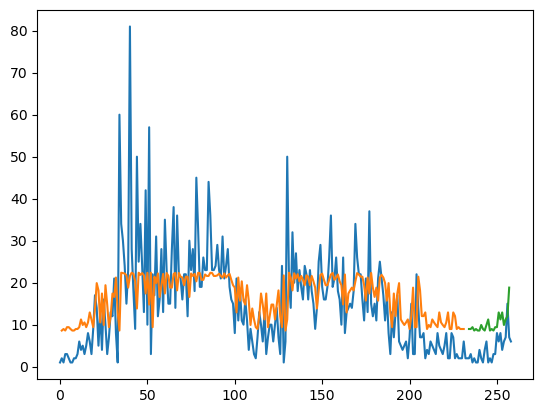

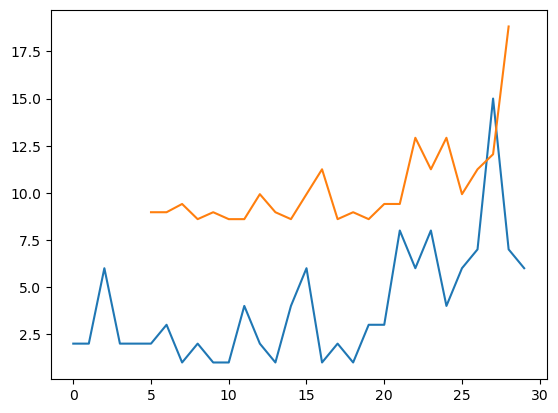

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="lienchiang_rnn+lstm_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('lienchiang_rnn+lstm_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lienchiang_rnn+lstm_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("lienchiang_rnn+lstm_5000_predict&real_4.png")
plt.show()